# Complex Least-norm Probelm

We consider the complex least $\ell_p$-norm problem,
\begin{equation}
\begin{aligned}
& \underset{x}{\text{minimize}}
& & \mid\mid x \mid\mid_p \\
& \text{subject to}
& & Ax = b \\
\end{aligned}
\end{equation}
where $A \in \mathbb{C}^{m \times n}$ , $b \in \mathbb{C}^m$ , and the variable is $x \in \mathbb{C}^n$. Here $ \mid\mid \cdot \mid\mid_p$ denotes the $\ell_p$-norm on $\mathbb{C}^n$ , defined as
\begin{equation}
\mid\mid x \mid\mid_p = \left( \sum_{i=1}^n \mid x_i \mid^p \right)^{1/p}
\end{equation}
for $p \geq 1$, and $\mid\mid x \mid\mid_\infty = \text{max}_{i=1,...,n} \mid x_i \mid$. We assume $A$ is full rank, and $m < n$.

In [2]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=5, suppress=True)
import matplotlib.pyplot as plt
from cvxpy import *

## Problem data

For this example, we will use random complex data:
* $A \in \mathbb{C}^{m \times n}$
* $b \in \mathbb{C}^m$

where $m=30$ and $n=100$.

In [3]:
m, n = 30, 100

# Generate complex matrices and generate b in order to the optimization problem been feasible
A = np.random.randn(m,n) + np.random.randn(m,n)*1j
B = np.dot(A, (np.random.randn(n,1) + np.random.randn(n,1)*1j))

print("Random {} {} matrix A".format(A.dtype, A.shape))
print("Random {} {} vector b".format(B.dtype, B.shape))

Random complex128 (30, 100) matrix A
Random complex128 (30, 1) vector b


## Complex least $\ell_2$-norm

Formulate the complex least $\ell_2$-norm problem as a real least $\ell_2$-norm problem:

\begin{equation}
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \mid\mid z \mid\mid_2 \\
& \text{subject to}
& & \begin{bmatrix}
    \mathcal{R}(A)       & -\mathcal{I}(A) \\
    \mathcal{I}(A)       & \mathcal{R}(A)
\end{bmatrix} z = \begin{bmatrix}
    \mathcal{R}(b) \\
    \mathcal{I}(b) \\
\end{bmatrix} \\
\end{aligned}
\end{equation}

where $z = (\mathcal{R}(x), \mathcal{I}(x))$. Note the above constraint is a way to express the complex Affine constraint $Ax=b$ using just real numbers.



In [4]:
# complex least norm problem with reals variables
# build real block matrix from complex matrices
As = bmat([[np.real(A), -np.imag(A)],[np.imag(A), np.real(A)]])
bs = bmat([[np.real(B)], [np.imag(B)]])

# problem declaration
z = Variable(2*n)
obj = Minimize(pnorm(z, 2))
const = [As * z == bs]
prob = Problem(obj, const)

# solve problem and build complex solution
prob.solve()
x_l2 = z.value[:n] + z.value[n:]*1j
print("Solution status: {}".format(prob.status))
print("Optimal Value p* = {}".format(prob.value))
print("Optimal solution x_l2* = {}".format(x_l2.ravel()))

Solution status: optimal
Optimal Value p* = 7.253486609145484
Optimal solution x_l2* = [[ 0.14360-0.64749j  0.11327+0.16545j -0.49112-0.10825j  0.30787-0.40066j
  -0.43531-0.27193j -0.88115+0.71783j -0.16587+0.39971j -0.05576+0.58657j
   0.24272+0.56557j -0.67125+0.05294j  1.22974-0.1573j  -0.17691+0.56216j
   0.59649-0.23684j -0.03849-0.70795j -0.65838-0.3451j  -0.28295+0.05268j
  -0.29710+0.2958j  -0.33798-0.71642j  0.46984-0.07433j  0.13806-0.91004j
   1.01594+0.19724j -0.24858-0.23255j  0.99068-0.95195j  0.48913+0.12549j
   0.94038+0.85195j  0.13514-0.09593j  0.45227-0.34627j  0.36611-0.26218j
   0.08660+0.5768j   1.00528-0.43199j  0.53315+0.17042j -0.28174+0.71166j
  -1.37697+0.43191j  0.69166+0.37246j -0.04093-0.3913j  -0.53900-0.14429j
  -0.92204-0.51409j  0.28221+0.63016j -0.28206-0.04979j  0.89837-0.4625j
   0.98153+0.40971j  0.50397+0.0001j  -0.26034+0.47777j -0.79951+0.34447j
  -0.76401-0.34118j  0.05386+0.52487j  0.07635-0.21075j  1.09499-0.26156j
  -1.00248-0.1621j   0.574

## Complex least $\ell_\infty$-norm problem

Likewise, formulate the complex least $\ell_\infty$-norm problem:
\begin{equation}
\begin{aligned}
& \underset{z}{\text{minimize}}
& & \mid\mid z \mid\mid_\infty \\
& \text{subject to}
& & \begin{bmatrix}
    \mathcal{R}(A)       & -\mathcal{I}(A) \\
    \mathcal{I}(A)       & \mathcal{R}(A)
\end{bmatrix} z = \begin{bmatrix}
    \mathcal{R}(b) \\
    \mathcal{I}(b) \\
\end{bmatrix} \\
\end{aligned}
\end{equation}


In [5]:
# least norm problem
z = Variable(2*n)
obj = Minimize(pnorm(z, 'inf'))
const = [As * z == bs]
prob = Problem(obj, const)

# solve problem and build complex solution
prob.solve()
x_linf = z.value[:n] + z.value[n:]*1j
print("Solution status: {}".format(prob.status))
print("Optimal Value p* = {}".format(prob.value))
print("Optimal solution x_linf* = {}".format(x_linf.ravel()))


Solution status: optimal
Optimal Value p* = 0.6919836932988194
Optimal solution x_linf* = [[ 0.34455-0.69198j  0.69198+0.18091j -0.69198-0.47399j  0.69198-0.60684j
  -0.69198-0.53564j -0.69198+0.69198j -0.24895+0.69198j -0.11166+0.69198j
  -0.69198+0.69198j -0.69198-0.35995j  0.69198+0.06151j -0.69198+0.69198j
   0.69198-0.69198j -0.37415-0.69198j -0.69198-0.69198j -0.69198+0.64698j
  -0.69198+0.69198j -0.69198-0.69198j  0.69198+0.69198j  0.09156-0.69198j
   0.69198+0.53579j -0.69198-0.69198j  0.69198-0.69198j  0.69198+0.69198j
   0.69198+0.1272j   0.69198-0.31652j  0.69198-0.69198j  0.69198-0.27239j
   0.14662+0.69198j  0.69198-0.51183j  0.69198+0.69198j -0.14408+0.69198j
  -0.69198+0.69198j  0.69198+0.69198j -0.69198-0.69198j -0.55075-0.69198j
  -0.69198-0.69198j -0.69198+0.69198j -0.35934+0.54794j  0.69198-0.69198j
   0.69198+0.69198j  0.69198-0.52875j -0.69198+0.69198j -0.69198+0.69198j
  -0.69198+0.00728j  0.69198+0.69198j  0.69198-0.69198j  0.69198-0.69198j
  -0.69198-0.69198j  0

/home/rfsantacruz/.conda/envs/ml_studies_env/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


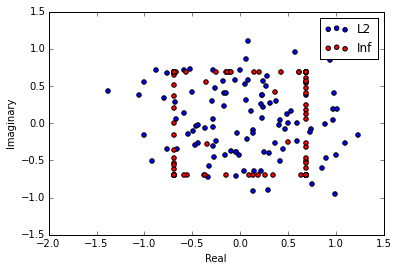

In [6]:
# Plot Solutions
plt.scatter(np.real(x_l2), np.imag(x_l2), c='b')
plt.scatter(np.real(x_linf), np.imag(x_linf), c='r')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend(['L2', 'Inf'])